## Project Week 3 Valeeva

## Houses in emergency condition in Sverdlovsk region, Russia

"In the comfort of your home" sounds like a sad joke for thousands of people in Russia who are living in the emergency conditions because their houses are too old, in physical deterioration or even have survived a fire. 

There is a government program for the resettlement, but does it work as planned?

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Alarm_Sverd_Clean.csv")

In [5]:
df.head()

,house_id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,...,resettled_ppl_count,empty_rooms_count,empty_rooms_square,redemption_amount,planned_providing_area_square,address2,rest,rest.1,Unnamed: 72,Unnamed: 73
0,9090614,92b30014-4d52-4e2e-892d-928142b924bf,NaN,a4ab722e-453a-4aed-bb73-728a05e2e27f,36a4e8b6-5c87-4f67-9ea1-12ac63f32939,обл,Свердловская,NaN,г. Алапаевск,г,...,NaN,NaN,NaN,NaN,NaN,обл. Свердловская,км. 123,д. 3,NaN,NaN
1,7784744,92b30014-4d52-4e2e-892d-928142b924bf,NaN,a4ab722e-453a-4aed-bb73-728a05e2e27f,e1112f73-1bf0-4674-87ad-0c51cb1587a0,обл,Свердловская,NaN,г. Алапаевск,г,...,NaN,1.0,"27,2",NaN,NaN,обл. Свердловская,ул. 19 Партсъезда,д. 4,NaN,NaN
2,9111875,92b30014-4d52-4e2e-892d-928142b924bf,NaN,a4ab722e-453a-4aed-bb73-728a05e2e27f,cae37672-d796-4d18-a785-18a01ac5af29,обл,Свердловская,NaN,г. Алапаевск,г,...,NaN,NaN,NaN,NaN,NaN,обл. Свердловская,ул. 240 км,д. 1,NaN,NaN
3,9111876,92b30014-4d52-4e2e-892d-928142b924bf,NaN,a4ab722e-453a-4aed-bb73-728a05e2e27f,cae37672-d796-4d18-a785-18a01ac5af29,обл,Свердловская,NaN,г. Алапаевск,г,...,NaN,NaN,NaN,NaN,NaN,обл. Свердловская,ул. 240 км,д. 2,NaN,NaN
4,8997823,92b30014-4d52-4e2e-892d-928142b924bf,NaN,a4ab722e-453a-4aed-bb73-728a05e2e27f,00ccecac-190f-404b-ab96-b1442330248b,обл,Свердловская,NaN,г. Алапаевск,г,...,NaN,NaN,NaN,NaN,NaN,обл. Свердловская,ул. 3 Интернационала,д. 1,NaN,NaN


Questions to data:
- How many houses in emergency condition are in Sverdlovsk region? Is it a lot?
- How many people live in them? Is it a lot? 
- additional question: which is the worst municipal district by the % of emergency houses?
    
- How many years does it take for a house to get into the emergency condition?
- What are the most popular reasons?
- How much time does it take for resettlement?
- Does resettlement happen according to the plan?

### Total number of houses in emergency condition in the region

In [6]:
len(df)

3398

In [8]:
df.shape

(3398, 74)

There is a total of 3398 houses in emergency condition in Sverdlovsk region, which is right in the middle of Russia. 

### % of houses in the region that are in emergency condition

In [19]:
#save to a new vari
round((len(df.index)/42210)*100)

8

### total number of people living in these conditions

In [20]:
df.residents_count.sum()

45607.0

### % of people in the region that live in emergency condition

In [22]:
round(df.residents_count.sum()/4290067*100)

1.0

In [1]:
#df.info(verbose=True)

In [28]:
df.determined_date.head()

0    5/17/2018
1    9/28/2017
2    1/12/2004
3    1/12/2004
4    4/29/1980
Name: determined_date, dtype: object

In [29]:
df.exploitation_start_year.head()

0    1911.0
1    1951.0
2    1965.0
3    1955.0
4    1930.0
Name: exploitation_start_year, dtype: float64

In [32]:
#df.determined_date.str.split(pat="/")

In [35]:
new = df.determined_date.str.split("/", n = 2, expand = True)

In [37]:
new.head()

,0,1,2
0,5,17,2018
1,9,28,2017
2,1,12,2004
3,1,12,2004
4,4,29,1980


In [39]:
df["determined_year"] = new[2]

In [40]:
df.determined_year.head()

0    2018
1    2017
2    2004
3    2004
4    1980
Name: 2, dtype: object

In [46]:
df = df.dropna(subset=['determined_year'])

In [47]:
df.determined_year = df.determined_year.astype(int)

In [10]:
df.exploitation_start_year

0       1911.0
1       1951.0
2       1965.0
3       1955.0
4       1930.0
         ...  
3393    1958.0
3394    1975.0
3395    1960.0
3396    1962.0
3397    1960.0
Name: exploitation_start_year, Length: 3398, dtype: float64

In [48]:
df['exploitation']=(df.determined_year-df.exploitation_start_year)

## On average, houses have been in use for 61 years before they are determined as emergency housing.

In [52]:
df['exploitation'].median()

61.0

### there are, however, some outliers, such as the oldest house which is more than 200 years old...

In [53]:
df['exploitation'].max()

204.0

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
df.loc[df['exploitation'] == 204]

,house_id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,cadastral_number,cadastral_registration_date,stage,built_year,exploitation_start_year,project_type,house_type,floor_count_max,floor_count_min,entrance_count,residents_count,area_total,area_residential,area_non_residential,area_common_property,area_land,monument_status,monument_document_date,monument_document_number,deterioration_total,determined_date,floor_type,wall_material,alarm_reason,alarm_reason_other,alarm_document_number,alarm_document_date,alarm_has_file,exp_name,exp_document_number,exp_document_date,exp_has_file,commission_document_number,commission_document_date,commission_has_file,further_use,decision_deadline_date,planned_resettlement_date,actual_resettlement_date,planned_demolition_date,planned_rooms_count,planned_rooms_square,planned_ppl_count,resettled_rooms_count,resettled_rooms_square,resettled_ppl_count,empty_rooms_count,empty_rooms_square,redemption_amount,planned_providing_area_square,address2,rest,rest.1,Unnamed: 72,Unnamed: 73,determined_year,exploitation
1152,8927972,92b30014-4d52-4e2e-892d-928142b924bf,NaN,4a90bd67-7682-4012-a0c5-09865b9d08a0,f34a5290-2b18-4649-a8ec-acf63bca8948,обл,Свердловская,NaN,г. Ирбит,г,Ирбит,ул,Ленина,19,NaN,NaN,NaN,"обл. Свердловская, г. Ирбит, ул. Ленина, д. 19",32d0e7de-079b-6e0a-b2cc-159ec5fa7b93,66:44:0101005:93,10/5/2005,Эксплуатируемый,1808.0,1808.0,NaN,Многоквартирный дом,2.0,2.0,2.0,87.0,"1730,5","1244,7",0,"485,8",1601,Не имеется,NaN,NaN,77,12/10/2012,NaN,NaN,Физический износ,NaN,1196-а,5/23/2013,Имеется,"ООО ""Актив Проект""",0362300228312000053-0198328-01,12/10/2012,Имеется,29,5/23/2013,Имеется,Снос,NaN,9/1/2025,NaN,12/31/2025,NaN,NaN,NaN,45.0,"845,7",87.0,2.0,"36,6","38080,36","875,11",обл. Свердловская,ул. Ленина,д. 19,NaN,NaN,2012,204.0


### or baby houses like this one which is just 1 year old but is already in emergency condition!

In [54]:
df['exploitation'].min()

1.0

In [ ]:
## Here is a distribution of the age of houses that are in emergency condition

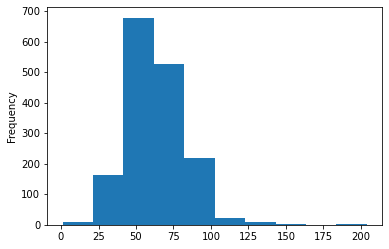

In [58]:
df['exploitation'].plot(kind='hist')

## As for the reason of the house being in emergency condition, it's mostly physical deterioration. However, fires are also a reason for 2% of the cases.

In [59]:
df.alarm_reason.value_counts()

Физический износ    1725
Пожар                 29
Иная                   1
Name: alarm_reason, dtype: int64

In [60]:
round(df.alarm_reason.value_counts(normalize=True)*100)

Физический износ    98.0
Пожар                2.0
Иная                 0.0
Name: alarm_reason, dtype: float64

## Resettlement

In [61]:
df.planned_resettlement_date.head()

0    9/17/2023
1    9/30/2024
2          NaN
3          NaN
4     9/1/2025
Name: planned_resettlement_date, dtype: object

In [62]:
df = df.dropna(subset=['planned_resettlement_date'])

In [63]:
new = df.planned_resettlement_date.str.split("/", n = 2, expand = True)

In [64]:
new.head()

,0,1,2
0,9,17,2023
1,9,30,2024
4,9,1,2025
5,9,1,2025
6,12,31,2022


In [65]:
df["resettlement_year"] = new[2]

In [67]:
df.resettlement_year.head()

0    2023
1    2024
4    2025
5    2025
6    2022
Name: resettlement_year, dtype: object

In [68]:
df.resettlement_year = df.resettlement_year.astype(int)

In [69]:
df['wait_years']=(df.resettlement_year-df.determined_year)

## On average, people wait for the resettlement for 10 years

In [70]:
df['wait_years'].median()

10.0

In [74]:
#df.loc[df['alarm_reason'] == 'Пожар'].groupby(by="resettlement_year")

In [86]:
df_fire = df[df['alarm_reason']=='Пожар']

In [92]:
#ok so our of 29 houses that were on fire I only have 12 with the filled resettlement year
len(df_fire)

12

In [ ]:
#we could use 0 as a replacement if this is not used throughout the dataset 

## And there are at least 6 houses that have been on fire but still waiting to be resettled!

In [99]:
len(df_fire[df_fire['resettlement_year']>2021])

6

## Needs to be done: For those houses that have a resettlement date and it's already passed, calculate how many % have actually been resettled.